<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-2.355792e-06,172.370273,172.370281,-0.000007
1,0.0,1.0,83.493076,71.654182,73.754014,1.860570e-06,238.901274,238.901271,0.000003
2,0.0,2.0,34.821697,72.166945,91.811871,-6.683655e-07,208.800513,208.800510,0.000002
3,0.0,3.0,73.535080,32.348287,95.612899,-1.414213e-05,211.496251,211.496265,-0.000014
4,0.0,4.0,20.252706,23.879753,95.219276,1.191984e-05,149.351747,149.351737,0.000010
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,8.693281e-05,167.872588,167.872520,0.000068
29996,999.0,26.0,24.186532,64.576322,90.025267,-1.141497e-06,188.788119,188.788113,0.000006
29997,999.0,27.0,58.294115,42.790093,35.087036,-4.089241e-07,146.171244,146.171254,-0.000010
29998,999.0,28.0,51.046087,68.182439,43.802989,3.091908e-06,173.031519,173.031516,0.000002


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-2.355792e-06,172.370273,172.370281,-0.000007
1,0.0,1.0,83.493076,71.654182,73.754014,1.860570e-06,238.901274,238.901271,0.000003
2,0.0,2.0,34.821697,72.166945,91.811871,-6.683655e-07,208.800513,208.800510,0.000002
3,0.0,3.0,73.535080,32.348287,95.612899,-1.414213e-05,211.496251,211.496265,-0.000014
4,0.0,4.0,20.252706,23.879753,95.219276,1.191984e-05,149.351747,149.351737,0.000010
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,8.693281e-05,167.872588,167.872520,0.000068
29996,999.0,26.0,24.186532,64.576322,90.025267,-1.141497e-06,188.788119,188.788113,0.000006
29997,999.0,27.0,58.294115,42.790093,35.087036,-4.089241e-07,146.171244,146.171254,-0.000010
29998,999.0,28.0,51.046087,68.182439,43.802989,3.091908e-06,173.031519,173.031516,0.000002


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    75.133016  41.668152  45.569108  ...  172.370273  172.370281 -0.000007
      1.0    83.493076  71.654182  73.754014  ...  238.901274  238.901271  0.000003
      2.0    34.821697  72.166945  91.811871  ...  208.800513  208.800510  0.000002
      3.0    73.535080  32.348287  95.612899  ...  211.496251  211.496265 -0.000014
      4.0    20.252706  23.879753  95.219276  ...  149.351747  149.351737  0.000010
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   76.826062  22.147932  58.898507  ...  167.872588  167.872520  0.000068
      26.0   24.186532  64.576322  90.025267  ...  188.788119  188.788113  0.000006
      27.0   58.294115  42.790093  35.087036  ...  146.171244  146.171254 -0.000010
      28.0   51.046087  68.182439  43.802989  ...  173.031519  173.031516  0.000002
      29.0   81.101055  97.291333  85.371344  ...  273.763732  273.763730  0.000003

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    75.133016  41.668152  45.569108  ...  172.370273  172.370281 -0.000007
      1.0    83.493076  71.654182  73.754014  ...  238.901274  238.901271  0.000003
      2.0    34.821697  72.166945  91.811871  ...  208.800513  208.800510  0.000002
      3.0    73.535080  32.348287  95.612899  ...  211.496251  211.496265 -0.000014
      4.0    20.252706  23.879753  95.219276  ...  149.351747  149.351737  0.000010
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   76.826062  22.147932  58.898507  ...  167.872588  167.872520  0.000068
      26.0   24.186532  64.576322  90.025267  ...  188.788119  188.788113  0.000006
      27.0   58.294115  42.790093  35.087036  ...  146.171244  146.171254 -0.000010
      28.0   51.046087  68.182439  43.802989  ...  173.031519  173.031516  0.000002
      29.0   81.101055  97.291333  85.371344  ...  273.763732  273.763730  0.000003

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.133016,41.668152,45.569108,-2.355792e-06,172.370273,172.370281,-0.000007
1,0.0,1.0,83.493076,71.654182,73.754014,1.860570e-06,238.901274,238.901271,0.000003
2,0.0,2.0,34.821697,72.166945,91.811871,-6.683655e-07,208.800513,208.800510,0.000002
3,0.0,3.0,73.535080,32.348287,95.612899,-1.414213e-05,211.496251,211.496265,-0.000014
4,0.0,4.0,20.252706,23.879753,95.219276,1.191984e-05,149.351747,149.351737,0.000010
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.826062,22.147932,58.898507,8.693281e-05,167.872588,167.872520,0.000068
29996,999.0,26.0,24.186532,64.576322,90.025267,-1.141497e-06,188.788119,188.788113,0.000006
29997,999.0,27.0,58.294115,42.790093,35.087036,-4.089241e-07,146.171244,146.171254,-0.000010
29998,999.0,28.0,51.046087,68.182439,43.802989,3.091908e-06,173.031519,173.031516,0.000002


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    75.133016  41.668152  45.569108  ...  172.370273  172.370281 -0.000007
      1.0    83.493076  71.654182  73.754014  ...  238.901274  238.901271  0.000003
      2.0    34.821697  72.166945  91.811871  ...  208.800513  208.800510  0.000002
      3.0    73.535080  32.348287  95.612899  ...  211.496251  211.496265 -0.000014
      4.0    20.252706  23.879753  95.219276  ...  149.351747  149.351737  0.000010
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   76.826062  22.147932  58.898507  ...  167.872588  167.872520  0.000068
      26.0   24.186532  64.576322  90.025267  ...  188.788119  188.788113  0.000006
      27.0   58.294115  42.790093  35.087036  ...  146.171244  146.171254 -0.000010
      28.0   51.046087  68.182439  43.802989  ...  173.031519  173.031516  0.000002
      29.0   81.101055  97.291333  85.371344  ...  273.763732  273.763730  0.000003

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

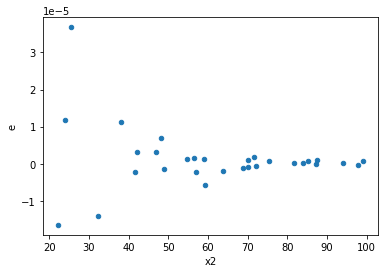

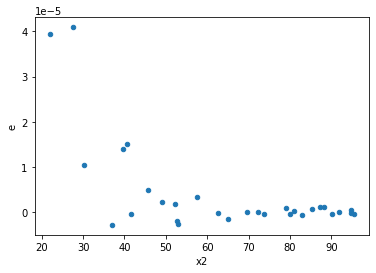

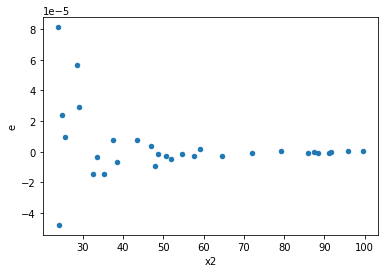

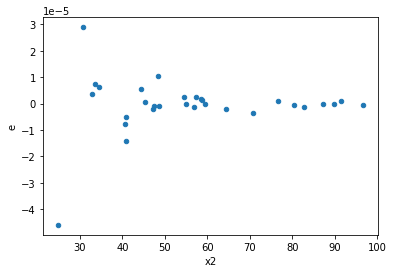

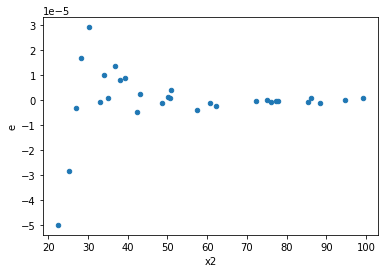

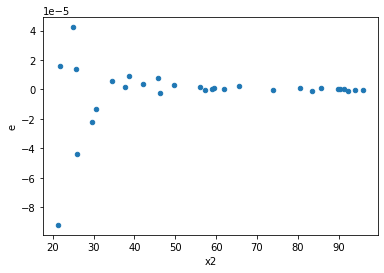

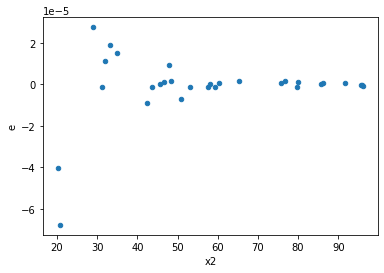

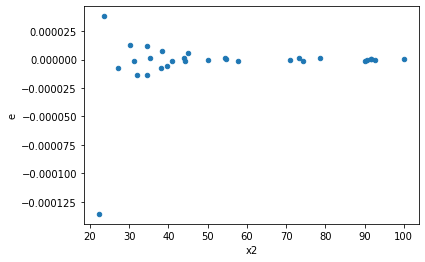

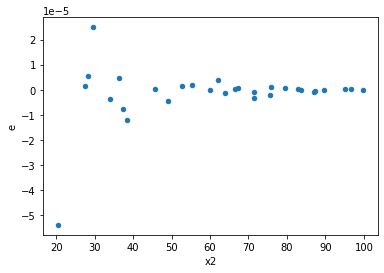

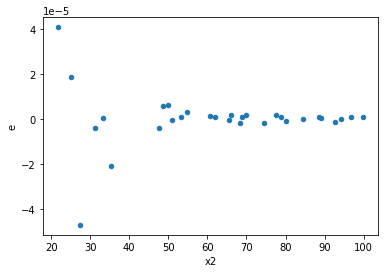

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,3.636895995288962e-12,1.500416755100197e-09,4.5461199941112027e-13,1.8755209438752463e-10,0.002423923875101016,2.2112788667972967e-10,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,3.077361345343831e-12,8.294007048364487e-10,3.846701681679789e-13,1.0367508810455609e-10,0.0037103432965500827,1.4878919837247069e-09,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,1.3667683386961504e-11,1.0597433010655595e-08,1.708460423370188e-12,1.3246791263319493e-09,0.0012897164221957157,1.3036228245457273e-11,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1.1596426045197574e-11,2.2199427064608316e-09,1.4495532556496968e-12,2.7749283830760395e-10,0.00522375014969882,6.859817154631349e-09,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,4.462999440515727e-12,3.2342007666890303e-09,5.578749300644658e-13,4.042750958361288e-10,0.0013799388975733447,1.7660751044756928e-11,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,5.016137368594671e-12,8.75541475820337e-09,6.270171710743339e-13,1.0944268447754213e-09,0.0005729183033727569,3.401222378551558e-13,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,4.640306940953997e-12,3.6423828341259905e-09,5.800383676192496e-13,4.552978542657488e-10,0.0012739756231767614,1.2336819796347568e-11,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6.810951151656934e-12,7.108461828360596e-09,8.513688939571168e-13,8.885577285450745e-10,0.0009581469685162147,3.43108560419157e-12,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,7.33436804775262e-12,3.2124079153873922e-09,9.167960059690775e-13,4.0155098942342403e-10,0.0022831372107574173,1.6910297572019706e-10,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64